# LINEAR REGRESSION WITH Y-JPM data and X-fama French 3 factor

### Fama French 3 Factor model

    An asset pricing model developed in 1992
    It expands on the capital asset pricing model (CAPM) by adding size risk and value risk factors to the market risk factor in CAPM

Factors
    1. Datatime
    2. MKT-RF - excess return  on the market
    3. SMB - Avg return of small minus big portfolios
    4. HML - high minus low avg return value of port - growth portfolios
    5. RMW -  diff between returns of firms  with high and low prob
These factors will be considered as X which are independent variable that will be used against JPM data (Y)

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

In [94]:
df_fama = pd.read_csv ('FF3factors.csv')

In [95]:
df_fama.head()

,Date,Mkt-RF,SMB,HML,RF
0,19260701,0.10,-0.24,-0.28,0.009
1,19260702,0.45,-0.32,-0.08,0.009
2,19260706,0.17,0.27,-0.35,0.009
3,19260707,0.09,-0.59,0.03,0.009
4,19260708,0.21,-0.36,0.15,0.009


In [96]:
df_fama = df_fama[df_fama.Date > 20160515]

In [97]:
df_fama.shape

(997, 5)

In [98]:
df_fama.head()

,Date,Mkt-RF,SMB,HML,RF
23729,20160516,0.99,0.28,-0.24,0.001
23730,20160517,-0.95,-0.78,0.61,0.001
23731,20160518,0.10,0.10,0.83,0.001
23732,20160519,-0.33,-0.32,-0.30,0.001
23733,20160520,0.75,0.90,-0.30,0.001


In [99]:
df_fama.tail()

,Date,Mkt-RF,SMB,HML,RF
24721,20200424,1.44,0.32,-0.09,0.0
24722,20200427,1.73,1.65,2.74,0.0
24723,20200428,-0.44,0.87,2.89,0.0
24724,20200429,2.92,1.87,2.04,0.0
24725,20200430,-1.18,-1.42,-1.63,0.0


In [100]:
df_fama.index = range(0, 997, 1)

In [101]:
df_fama.head()

,Date,Mkt-RF,SMB,HML,RF
0,20160516,0.99,0.28,-0.24,0.001
1,20160517,-0.95,-0.78,0.61,0.001
2,20160518,0.10,0.10,0.83,0.001
3,20160519,-0.33,-0.32,-0.30,0.001
4,20160520,0.75,0.90,-0.30,0.001


In [102]:
df_jpm = pd.read_csv('JPM.csv')

In [103]:
df_jpm.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-05-16,61.209999,61.990002,61.000000,61.660000,55.047691,10951300
1,2016-05-17,61.430000,62.160000,61.150002,61.660000,55.047691,12180900
2,2016-05-18,61.700001,64.169998,61.689999,64.040001,57.172466,24007100
3,2016-05-19,63.529999,64.220001,62.900002,63.389999,56.592175,16076200
4,2016-05-20,63.860001,64.190002,63.369999,63.509998,56.699303,11862000


In [104]:
df_jpm = df_jpm[df_jpm.Date <= '2020-04-30']

In [105]:
df_jpm.shape

(997, 7)

In [106]:
df_jpm.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-05-16,61.209999,61.990002,61.000000,61.660000,55.047691,10951300
1,2016-05-17,61.430000,62.160000,61.150002,61.660000,55.047691,12180900
2,2016-05-18,61.700001,64.169998,61.689999,64.040001,57.172466,24007100
3,2016-05-19,63.529999,64.220001,62.900002,63.389999,56.592175,16076200
4,2016-05-20,63.860001,64.190002,63.369999,63.509998,56.699303,11862000


In [107]:
df_jpm.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
992,2020-04-24,90.639999,91.099998,88.489998,90.709999,90.709999,15815300
993,2020-04-27,91.940002,95.629997,91.540001,94.620003,94.620003,22870200
994,2020-04-28,97.809998,98.360001,95.029999,95.290001,95.290001,20238900
995,2020-04-29,99.080002,99.449997,97.269997,97.860001,97.860001,20462600
996,2020-04-30,95.599998,96.839996,94.550003,95.760002,95.760002,19127600


In [108]:
df_jpm['MktRF'] = df_fama['Mkt-RF']

In [109]:
df_jpm.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MktRF
0,2016-05-16,61.209999,61.990002,61.000000,61.660000,55.047691,10951300,0.99
1,2016-05-17,61.430000,62.160000,61.150002,61.660000,55.047691,12180900,-0.95
2,2016-05-18,61.700001,64.169998,61.689999,64.040001,57.172466,24007100,0.10
3,2016-05-19,63.529999,64.220001,62.900002,63.389999,56.592175,16076200,-0.33
4,2016-05-20,63.860001,64.190002,63.369999,63.509998,56.699303,11862000,0.75


In [110]:
#df_jpm['MktRF'] = df_fama['Mkt-RF']
df_jpm['SMB'] = df_fama['SMB']
df_jpm['HML'] = df_fama['HML']
df_jpm['RF'] = df_fama['RF']

In [111]:
df_jpm.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MktRF,SMB,HML,RF
0,2016-05-16,61.209999,61.990002,61.000000,61.660000,55.047691,10951300,0.99,0.28,-0.24,0.001
1,2016-05-17,61.430000,62.160000,61.150002,61.660000,55.047691,12180900,-0.95,-0.78,0.61,0.001
2,2016-05-18,61.700001,64.169998,61.689999,64.040001,57.172466,24007100,0.10,0.10,0.83,0.001
3,2016-05-19,63.529999,64.220001,62.900002,63.389999,56.592175,16076200,-0.33,-0.32,-0.30,0.001
4,2016-05-20,63.860001,64.190002,63.369999,63.509998,56.699303,11862000,0.75,0.90,-0.30,0.001


In [112]:
df_jpm['stock_return'] = ((df_jpm['Close']-df_jpm['Open'])/df_jpm['Close'])

In [113]:
df_jpm.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MktRF,SMB,HML,RF,stock_return
0,2016-05-16,61.209999,61.990002,61.000000,61.660000,55.047691,10951300,0.99,0.28,-0.24,0.001,0.007298
1,2016-05-17,61.430000,62.160000,61.150002,61.660000,55.047691,12180900,-0.95,-0.78,0.61,0.001,0.003730
2,2016-05-18,61.700001,64.169998,61.689999,64.040001,57.172466,24007100,0.10,0.10,0.83,0.001,0.036540
3,2016-05-19,63.529999,64.220001,62.900002,63.389999,56.592175,16076200,-0.33,-0.32,-0.30,0.001,-0.002209
4,2016-05-20,63.860001,64.190002,63.369999,63.509998,56.699303,11862000,0.75,0.90,-0.30,0.001,-0.005511


In [114]:
# import numpy as np
# df_jpm['log_return'] = np.log(df_jpm['Close']).diff().dropna()
# df_jpm['log_return'].iloc[0] = 0.0

In [115]:
T = df_jpm.shape[0]

In [116]:
T

997

In [117]:
Y = df_jpm['stock_return'].values

In [118]:
Y.shape

(997,)

In [119]:
columns = ['MktRF','SMB','HML']
X=df_jpm[columns]

In [120]:
X.head()

,MktRF,SMB,HML
0,0.99,0.28,-0.24
1,-0.95,-0.78,0.61
2,0.10,0.10,0.83
3,-0.33,-0.32,-0.30
4,0.75,0.90,-0.30


In [121]:
X.shape

(997, 3)

In [122]:
import numpy as np
X = np.column_stack([np.ones((len(X),1)),X])

In [123]:
X.shape

(997, 4)

In [124]:
X

array([[ 1.  ,  0.99,  0.28, -0.24],
       [ 1.  , -0.95, -0.78,  0.61],
       [ 1.  ,  0.1 ,  0.1 ,  0.83],
       ...,
       [ 1.  , -0.44,  0.87,  2.89],
       [ 1.  ,  2.92,  1.87,  2.04],
       [ 1.  , -1.18, -1.42, -1.63]])

In [125]:
Y=np.asarray(Y)
Y = Y.reshape(997,1)

In [126]:
Y.shape

(997, 1)

In [127]:
'OLS REGRESSION STARTS'
'Linear Regression of Y: T x 1 on'
'Regressors X: T x N'
invXX = np.linalg.inv(X.transpose()@X)
invXX

array([[ 1.00966097e-03, -4.11614549e-05,  2.21836050e-05,
         1.04241771e-04],
       [-4.11614549e-05,  6.76757895e-04, -1.27807128e-04,
        -1.96012077e-04],
       [ 2.21836050e-05, -1.27807128e-04,  3.08355671e-03,
        -1.82296995e-04],
       [ 1.04241771e-04, -1.96012077e-04, -1.82296995e-04,
         2.20817362e-03]])

In [128]:
invXX.shape

(4, 4)

In [129]:
'OLS estimates for coefficients: X x 1'
beta_hat = invXX@X.transpose()@Y
beta_hat

array([[ 0.00032475],
       [ 0.00433571],
       [-0.00077498],
       [ 0.0056215 ]])

In [130]:
'Predictive value of Y using OLS'
y_hat = X@beta_hat
y_hat.shape

(997, 1)

In [131]:
'Residuals from OLS'
residuals = Y - y_hat
residuals.shape

(997, 1)

In [132]:
'Variance of residuals'
variance = (1/T)*residuals.transpose()@residuals
variance

array([[9.26288661e-05]])

In [133]:
'standard deviation of Y or residuals'
standard_deviation = np.sqrt(variance)

In [134]:
'variance-covariance matrix of beta_hat'
varcov_beta_hat = (variance)*invXX
std_beta_hat = np.sqrt(T*np.diag(varcov_beta_hat))


In [135]:
N = X.shape

In [136]:

'Calculate R-square'
R_square = 1- (residuals.transpose()@residuals)/(T*np.var(Y))
adj_R_square = 1-(1-R_square)*(T-1)/(T-N[1])
print(R_square)
print(adj_R_square)


[[0.35098948]]
[[0.34902873]]


In [137]:
'Test Each Coefficient: beta_i'
'Null Hypothesis: beta_i = 0'
t_stat = (beta_hat.transpose()-0)/std_beta_hat
p_val_t = 1-ss.norm.cdf(t_stat)


In [138]:
'Test of Joint Significance of Model'
F_stat = (beta_hat.transpose()@np.linalg.inv(varcov_beta_hat)@beta_hat/N[1])/\
         (residuals.transpose()@residuals/(T-N[1]))

p_val_F = 1-ss.f.cdf(F_stat,N[1]-1,T-N[1])

p_val_F

array([[1.11022302e-16]])

In [147]:
def print_all_values():
    print('Variance-------------',variance)
    print('Standard Deviation---',standard_deviation)
    print('R Square-------------',R_square)
    print('Adjusted R Square----',adj_R_square)
    print('P values-------------',p_val_t,p_val_F)
    plt.plot(y_hat, color='green')
    plt.plot(Y, color = 'red')
    plt.show()


Variance------------- [[9.26288661e-05]]
Standard Deviation--- [[0.00962439]]
R Square------------- [[0.35098948]]
Adjusted R Square---- [[0.34902873]]
P values------------- [[0.48658556 0.29169752 0.51831469 0.34691813]] [[1.11022302e-16]]


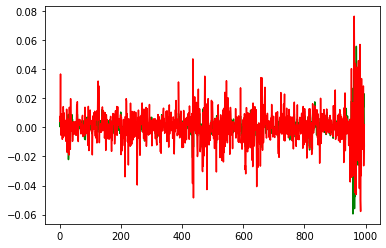

In [148]:
print_all_values()

In [155]:
df_jpm['stock_return'] = ((df_jpm['Close']-df_jpm['Open'])/df_jpm['Close'])

def OLS_Regression():
    T = df_jpm.shape[0]
    Y = df_jpm['stock_return'].values
    columns = ['MktRF','SMB','HML']
    X=df_jpm[columns]
    X = np.column_stack([np.ones((len(X),1)),X])
    N = X.shape
    Y=np.asarray(Y)
    Y = Y.reshape(997,1)
    
    'OLS REGRESSION STARTS'
    'Linear Regression of Y: T x 1 on'
    'Regressors X: T x N'
    invXX = np.linalg.inv(X.transpose()@X)
    
    'OLS estimates for coefficients: X x 1'
    beta_hat = invXX@X.transpose()@Y

    'Predictive value of Y using OLS'
    y_hat = X@beta_hat

    'Residuals from OLS'
    residuals = Y - y_hat

    'Variance of residuals'
    variance = (1/T)*residuals.transpose()@residuals

    'standard deviation of Y or residuals'
    standard_deviation = np.sqrt(variance)

    'variance-covariance matrix of beta_hat'
    varcov_beta_hat = (variance)*invXX
    std_beta_hat = np.sqrt(T*np.diag(varcov_beta_hat))

    'Calculate R-square'
    R_square = 1- (residuals.transpose()@residuals)/(T*np.var(Y))
    adj_R_square = 1-(1-R_square)*(T-1)/(T-N[1])
 
    'Test Each Coefficient: beta_i'
    'Null Hypothesis: beta_i = 0'
    t_stat = (beta_hat.transpose()-0)/std_beta_hat
    p_val_t = 1-ss.norm.cdf(t_stat)

    'Test of Joint Significance of Model'
    F_stat = (beta_hat.transpose()@np.linalg.inv(varcov_beta_hat)@beta_hat/N[1])/\
             (residuals.transpose()@residuals/(T-N[1]))
    p_val_F = 1-ss.f.cdf(F_stat,N[1]-1,T-N[1])
    
    print('Variance-------------',variance)
    print('Standard Deviation---',standard_deviation)
    print('R Square-------------',R_square)
    print('Adjusted R Square----',adj_R_square)
    print('P value-------------',p_val_F)


OLS_Regression()


Variance------------- [[9.26288661e-05]]
Standard Deviation--- [[0.00962439]]
R Square------------- [[0.35098948]]
Adjusted R Square---- [[0.34902873]]
P value------------- [[1.11022302e-16]]


Variance------------- [[0.96750207]]
Standard Deviation--- [[0.98361683]]
R Square------------- [[0.3374155]]
Adjusted R Square---- [[0.33541373]]
P value------------- [[1.11022302e-16]]


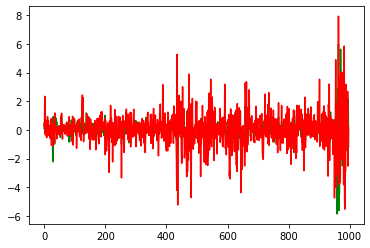

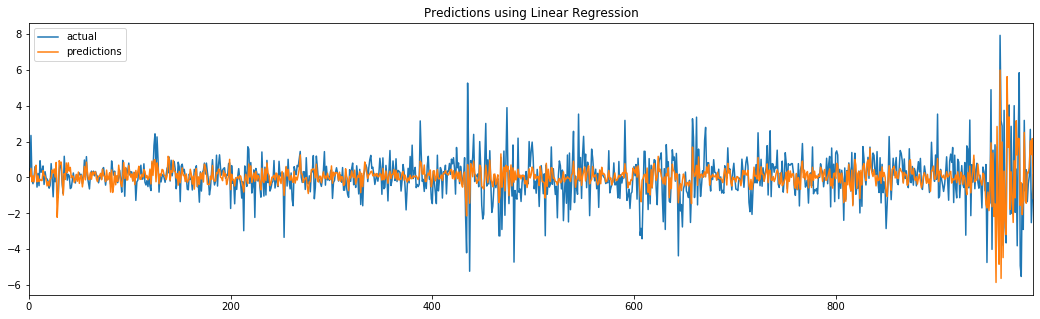

In [171]:
df_jpm['stock_return'] = (df_jpm['Close']-df_jpm['Open'])

def OLS_Regression():
    T = df_jpm.shape[0]
    Y = df_jpm['stock_return'].values
    columns = ['MktRF','SMB','HML']
    X=df_jpm[columns]
    X = np.column_stack([np.ones((len(X),1)),X])
    N = X.shape
    Y=np.asarray(Y)
    Y = Y.reshape(997,1)
    
    'OLS REGRESSION STARTS'
    'Linear Regression of Y: T x 1 on'
    'Regressors X: T x N'
    invXX = np.linalg.inv(X.transpose()@X)
    
    'OLS estimates for coefficients: X x 1'
    beta_hat = invXX@X.transpose()@Y

    'Predictive value of Y using OLS'
    y_hat = X@beta_hat

    'Residuals from OLS'
    residuals = Y - y_hat

    'Variance of residuals'
    variance = (1/T)*residuals.transpose()@residuals

    'standard deviation of Y or residuals'
    standard_deviation = np.sqrt(variance)

    'variance-covariance matrix of beta_hat'
    varcov_beta_hat = (variance)*invXX
    std_beta_hat = np.sqrt(T*np.diag(varcov_beta_hat))

    'Calculate R-square'
    R_square = 1- (residuals.transpose()@residuals)/(T*np.var(Y))
    adj_R_square = 1-(1-R_square)*(T-1)/(T-N[1])
 
    'Test Each Coefficient: beta_i'
    'Null Hypothesis: beta_i = 0'
    t_stat = (beta_hat.transpose()-0)/std_beta_hat
    p_val_t = 1-ss.norm.cdf(t_stat)

    'Test of Joint Significance of Model'
    F_stat = (beta_hat.transpose()@np.linalg.inv(varcov_beta_hat)@beta_hat/N[1])/\
             (residuals.transpose()@residuals/(T-N[1]))
    p_val_F = 1-ss.f.cdf(F_stat,N[1]-1,T-N[1])
    
    print('Variance-------------',variance)
    print('Standard Deviation---',standard_deviation)
    print('R Square-------------',R_square)
    print('Adjusted R Square----',adj_R_square)
    print('P value-------------',p_val_F)
    plt.plot(y_hat, color='green')
    plt.plot(Y, color = 'red')
    plt.show()

    pred = pd.DataFrame(y_hat)
    act = pd.DataFrame(Y)

    plot_df = pd.DataFrame({"actual": act[0], "predictions": pred[0]})
    plot_df.plot(figsize=(18, 5), title='Predictions using Linear Regression')




OLS_Regression()

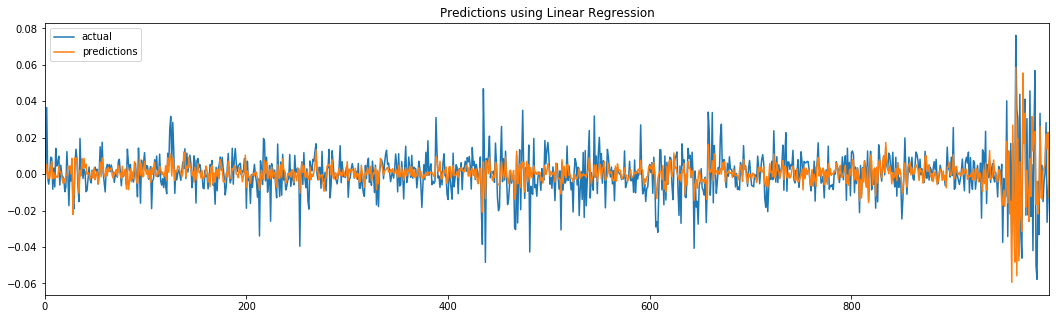

In [165]:
pred = pd.DataFrame(y_hat)
act = pd.DataFrame(Y)

plot_df = pd.DataFrame({"actual": act[0], "predictions": pred[0]})
plot_df.plot(figsize=(18, 5), title='Predictions using Linear Regression')

